In [1]:
!pip install tensorflow==2.3.1
!pip install tensorflow-gpu==2.3.1
!pip install keras==2.4.3
!pip install keras-vggface==0.6
!pip install keras_applications==1.0.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 52.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast

In [2]:
from keras_vggface.vggface import VGGFace
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.models import Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import itertools
from sklearn.metrics import roc_curve


In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/My Drive/Project'

!unzip "/content/drive/My Drive/Project/Dataset" -d "/content/"

Mounted at /content/drive
/content/drive/My Drive/Project
Archive:  /content/drive/My Drive/Project/Dataset.zip
   creating: /content/Vgg_Dataset/test/
   creating: /content/Vgg_Dataset/test/C1/
  inflating: /content/Vgg_Dataset/test/C1/dr_0_250.jpg  
  inflating: /content/Vgg_Dataset/test/C1/dr_1_3372.jpg  
  inflating: /content/Vgg_Dataset/test/C1/dr_10_7640.jpg  
  inflating: /content/Vgg_Dataset/test/C1/dr_11_4356.jpg  
  inflating: /content/Vgg_Dataset/test/C1/dr_12_9310.jpg  
  inflating: /content/Vgg_Dataset/test/C1/dr_15_1218.jpg  
  inflating: /content/Vgg_Dataset/test/C1/dr_19_7164.jpg  
  inflating: /content/Vgg_Dataset/test/C1/dr_21_2733.jpg  
  inflating: /content/Vgg_Dataset/test/C1/dr_21_7228.jpg  
  inflating: /content/Vgg_Dataset/test/C1/dr_22_2364.jpg  
  inflating: /content/Vgg_Dataset/test/C1/dr_23_5437.jpg  
  inflating: /content/Vgg_Dataset/test/C1/dr_24_6963.jpg  
  inflating: /content/Vgg_Dataset/test/C1/dr_26_9205.jpg  
  inflating: /content/Vgg_Dataset/test/C1

In [4]:
def load_dataset(dataset_Path,batch_size):


  #train_data_dir='/content/mtcnn_icdfd_splitt/train'
  test_data_dir = '/content/Vgg_Dataset/test'
 # val_data_dir = '/content/mtcnn_icdfd_splitt/val'


  test_datagen = ImageDataGenerator(rescale=1./255)

  test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(224,224),
                        batch_size=1,
                        shuffle=False,
                        seed=42,
                        class_mode='categorical')

  Class_lablels=sorted(os.listdir(test_data_dir))
  #print(test_generator.classes)
  #print(test_generator.class_indices)
  return Class_lablels,test_generator


In [5]:
classifier = load_model('/content/drive/MyDrive/Project/Reva_Vgg_Model_V1.h5')
classifier.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)      

In [ ]:
batch_size=50 # earlier 256
dataset_path="/content/"


class_labels,test_data=load_dataset(dataset_path,batch_size)
print("darshan",class_labels)

Found 209 images belonging to 8 classes.
darshan ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']


In [7]:
loss,acc=classifier.evaluate_generator(test_data)
print(loss)
print(acc) 

Instructions for updating:
Please use Model.evaluate, which supports generators.


0.0012673221062868834
1.0


In [8]:
true_classes = test_data.classes

class_indices = test_data.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

vgg_preds = classifier.predict(test_data)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)
print(vgg_pred_classes)

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy : {:.2f}%".format(vgg_acc * 100))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
VGG16 Model Accuracy : 100.00%


In [57]:
class_names = test_data.class_indices

print(classification_report(true_classes, vgg_pred_classes,target_names=class_names))
print("None ", metrics.precision_score(true_classes, vgg_pred_classes, average=None))  

              precision    recall  f1-score   support

          C1       1.00      1.00      1.00        29
          C2       1.00      1.00      1.00        28
          C3       1.00      1.00      1.00        28
          C4       1.00      1.00      1.00        26
          C5       1.00      1.00      1.00        25
          C6       1.00      1.00      1.00        26
          C7       1.00      1.00      1.00        24
          C8       1.00      1.00      1.00        23

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209

None  [1. 1. 1. 1. 1. 1. 1. 1.]


In [58]:
from PIL import Image
import numpy as np
import h5py

#image = Image.open('/content/3. IMFDB_60_20_20/test/SoumithraChatterjee/xSoumithraChattergee_6.jpg').resize((224,224))
image = Image.open('/content/Vgg_Dataset/test/C1/P (9).jpg').resize((224,224))
imarr = np.array(image).astype(np.float32)

    #Turn image into a 1-element batch
imarr = np.expand_dims(imarr, axis=0)

    #Prediction Probability vector
out= classifier.predict(imarr)
    #print(str(out))

    #Most Probable item
best_index = np.argmax(out, axis=1)[0]

print(best_index)
print(test_data.class_indices)
print('the Predicted Class is',class_labels[best_index])

0
{'C1': 0, 'C2': 1, 'C3': 2, 'C4': 3, 'C5': 4, 'C6': 5, 'C7': 6, 'C8': 7}
the Predicted Class is C1


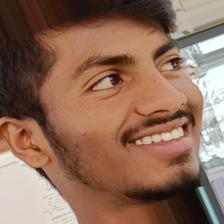

In [63]:
from keras.preprocessing import image
from keras_vggface import utils

#img = image.load_img('/content/3. IMFDB_60_20_20/test/ANR/ANR_163.jpg', target_size=(224, 224))
img = image.load_img('/content/Vgg_Dataset/test/C8/dr_8_4832.jpg', target_size=(224, 224))
img

In [64]:
import cv2
font=cv2.FONT_HERSHEY_COMPLEX

In [71]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = utils.preprocess_input(x, version=2) # or version=2
preds = classifier.predict(x)

best_index = np.argmax(preds, axis=1)[0]
prob=np.argmax(preds,axis=1)

prediction=classifier.predict(imarr)
probabilityValue=np.amax(prediction)

print(probabilityValue)
print(best_index)
print(class_labels[best_index])
if class_labels[best_index] == "C1":
  print("kamal")
elif class_labels[best_index] == "C2":
  print("Shahnawaz")
elif class_labels[best_index] == "C3":
  print("Rehan")
elif class_labels[best_index] == "C4":
  print("Manisha")
elif class_labels[best_index] == "C5":
  print("Nithin Raj")
elif class_labels[best_index] == "C6":
  print("Ashfaq")
elif class_labels[best_index] == "C7":
  print("Prudivi")
elif class_labels[best_index] == "C8":
  print("Suraj")
else:
  print("None")

1.0
7
C8
Suraj


In [46]:
print(true_classes[0:21])
k=np.array(true_classes[0:21])
print(k[0])
print(class_labels[true_classes[i] for i in true_classes])

SyntaxError: ignored

Confusion matrix
[[29  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0 26  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 23]]
Confusion matrix, without normalization
['C1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15']


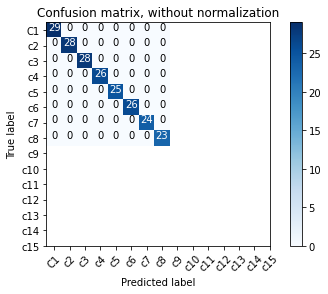

In [41]:


cnf_matrix=confusion_matrix(true_classes, vgg_pred_classes)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    print(classes)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix')
print(cnf_matrix[0:10,0:10])

plt.figure()
labels=['C1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15']
plot_confusion_matrix(cnf_matrix[0:15,0:15], labels,
                      title='Confusion matrix, without normalization')

#plt.figure()
#plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                     # title='Confusion matrix, without normalization')

#print("Confusion matrix:\n%s" % confusion_matrix(np.array(true_classes), vgg_pred_classes))
#print(classification_report(np.array(true_classes), vgg_pred_classes))

In [42]:
from sklearn.metrics import roc_curve
y_pred_keras = classifier.predict(test_data).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(true_classes, y_pred_keras)

KeyboardInterrupt: ignored